The Rastrigin function is commonly used as a test bed for trying out gradient-based optimization algorithms. Its properties include easy generalization to more than two dimensions, a global minimum at zero as well as many local minima that can easily detour an algorithm, especially as dimensionality increases.

More information can be found on its Wiki page : https://en.wikipedia.org/wiki/Rastrigin_function

To see why it's such a useful function for this purpose, one only needs to check out ridges in the surface area evident in its plot. First, using SymPy : 

  2                                                 
 ___                                                
 ╲                                                  
  ╲   ⎛ 2    2                                ⎞     
  ╱   ⎝x  + y  - 10⋅cos(2⋅π⋅x) - 10⋅cos(2⋅π⋅y)⎠ + 20
 ╱                                                  
 ‾‾‾                                                
i = 1                                               


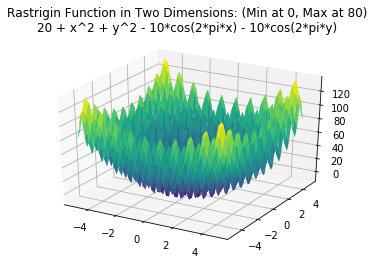

Minimum for x = 0 and y = 0 occurs at 0.
Value for x = -5 and y = -4.3 occurs at 56.58.


In [14]:
from sympy import Sum, cos, pi, symbols, pprint, init_printing, Symbol
from sympy.plotting import plot3d

x, y = symbols('x y')
i = Symbol('i', type = 'integer')
init_printing()
A = 10
n = 2
xmin, xmax = (-5.12, 5.12)

Rastrigin = Sum(x**2 + y**2 - A*(cos(2*pi*x)) - A*(cos(2*pi*y)) , (i,1,n)) + A*n
pprint(Rastrigin)   
p = plot3d(Rastrigin, (x, -5, 5), (y, -5, 5), 
           title = 'Rastrigin Function in Two Dimensions: (Min at 0, Max at 80)\n20 + x^2 + y^2 - 10*cos(2*pi*x) - 10*cos(2*pi*y)\n',
           show = False)
p.show()

Rastrigin2 = A*n + x**2 + y**2 - A*(cos(2*pi.round(4)*x)) - A*(cos(2*pi.round(4)*y))
print("Minimum for x = 0 and y = 0 occurs at {0}.".format(Rastrigin2.subs({x:0, y:0})))
print("Value for x = -5 and y = -4.3 occurs at {0}.".format(round(Rastrigin2.subs({x:-5, y:-4.3}),2)))

Despite the neat things you can do with SymPy - the pretty-print formula output from pprint() above, and countless other functions - its plotting module leaves a lot to be desired. Despite having its roots in matplotlib, there are some things that are either difficult or impossible to do in the package's current version. It's easier to take the data directly to matplotlib and customize the graph to your heart's content:

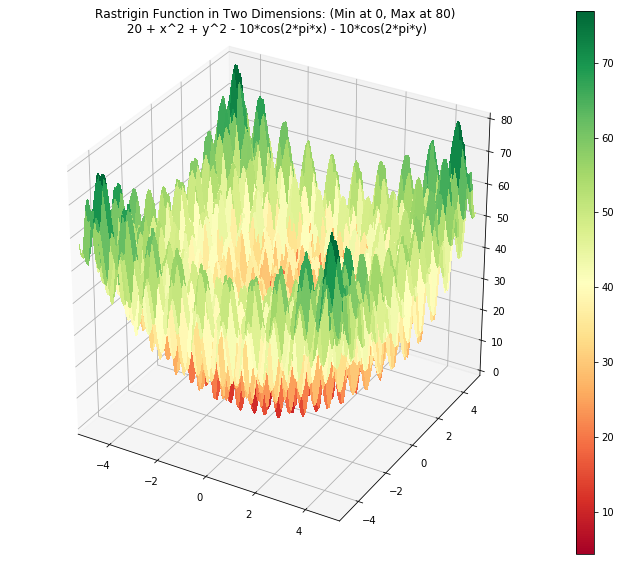

In [3]:
from math import cos, pi
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

xDomain = list(np.arange(-5.12, 5.12, .08))
yDomain = list(np.arange(-5.12, 5.12, .08))

X, Y = np.meshgrid(xDomain, yDomain)
z = [20 + x**2 + y**2 - (10*(cos(2*pi*x) + cos(2*pi*y))) for x in xDomain for y in yDomain]
Z = np.array(z).reshape(128,128)

fig = plt.figure(figsize = (12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdYlGn, linewidth=1, antialiased=False)

ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_zlim(0, 80)
fig.colorbar(surf, aspect=30)

plt.title('Rastrigin Function in Two Dimensions: (Min at 0, Max at 80)\n 20 + x^2 + y^2 - 10*cos(2*pi*x) - 10*cos(2*pi*y)\n')
plt.show()